<a href="https://colab.research.google.com/github/Vaishnavi200527/RollNo_39_MLDL_Lab/blob/main/EXP2_MLDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
import os
import requests

file_path = '/content/insurance.csv'

if not os.path.exists(file_path):
    print(f"File not found at {file_path}. Please ensure 'insurance.csv' is uploaded to /content/.")
    raise FileNotFoundError(f"Could not find {file_path}. Please upload it manually.")

data = pd.read_csv(file_path)

encoder = LabelEncoder()
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = encoder.fit_transform(data[column])

X = data.drop('charges', axis=1)
y = data['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

models = {
    "Multiple Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(alpha=0.1),
    "Ridge Regression": Ridge(alpha=1.0)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print("\n", name)
    print("MSE:", mean_squared_error(y_test, pred))
    print("R2 Score:", r2_score(y_test, pred))


 Multiple Linear Regression
MSE: 41115752.87801166
R2 Score: 0.6361789348773292

 Lasso Regression
MSE: 41114774.2744766
R2 Score: 0.6361875942488726

 Ridge Regression
MSE: 40970739.58837261
R2 Score: 0.637462114335333


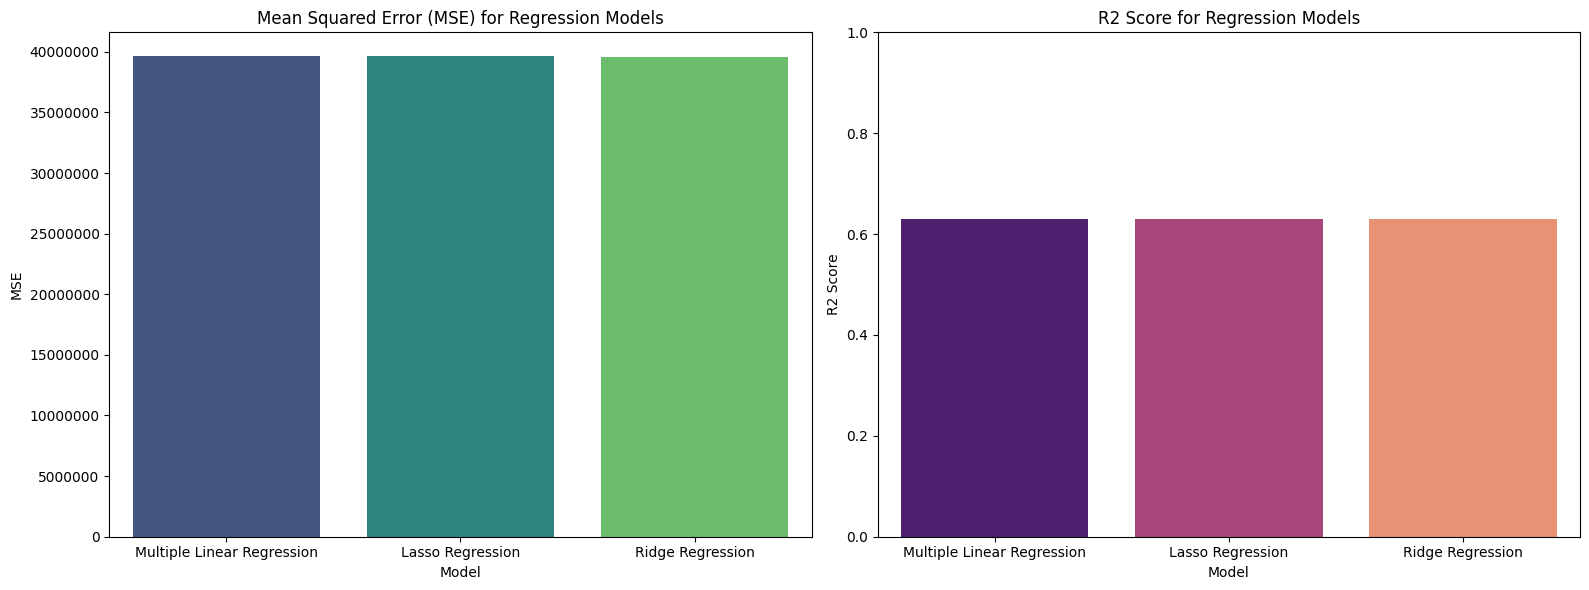

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

model_names = []
mse_scores = []
r2_scores = []

for name, model in models.items():
    pred = model.predict(X_test)
    model_names.append(name)
    mse_scores.append(mean_squared_error(y_test, pred))
    r2_scores.append(r2_score(y_test, pred))

results_df = pd.DataFrame({
    'Model': model_names,
    'MSE': mse_scores,
    'R2 Score': r2_scores
})

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(x='Model', y='MSE', data=results_df, ax=axes[0], palette='viridis', hue='Model', legend=False)
axes[0].set_title('Mean Squared Error (MSE) for Regression Models')
axes[0].set_ylabel('MSE')
axes[0].ticklabel_format(style='plain', axis='y')

sns.barplot(x='Model', y='R2 Score', data=results_df, ax=axes[1], palette='magma', hue='Model', legend=False)
axes[1].set_title('R2 Score for Regression Models')
axes[1].set_ylabel('R2 Score')
axes[1].set_ylim(0, 1)

plt.tight_layout()
plt.show()